# ⚛️ H₂ — Ground-State VQE vs Bond Length (Noiseless, UCCSD)

This notebook performs a bond-length scan for H₂ using the production VQE API:

```python
from vqe.core import run_vqe_geometry_scan
```

---
## Simulation setup

- Molecule: H₂
- Geometry: H–H bond length scan
- Distances: 0.25 Å → 2.50 Å (51 points)
- Basis: STO-3G
- Ansatz: UCCSD
- Optimizer: Adam
- Noise: None (noiseless)

Hamiltonian construction, ansatz building, optimisation, caching, and plotting
are handled by the package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vqe.core import run_vqe_geometry_scan
from common.molecule_viz import plot_molecule

seeds = [0, 1, 2]

# 🧬 Bond-Length Grid

In [2]:
bond_lengths = np.linspace(0.25, 2.50, 51)
print("Bond-length grid (Å):", bond_lengths)

Bond-length grid (Å): [0.25  0.295 0.34  0.385 0.43  0.475 0.52  0.565 0.61  0.655 0.7   0.745
 0.79  0.835 0.88  0.925 0.97  1.015 1.06  1.105 1.15  1.195 1.24  1.285
 1.33  1.375 1.42  1.465 1.51  1.555 1.6   1.645 1.69  1.735 1.78  1.825
 1.87  1.915 1.96  2.005 2.05  2.095 2.14  2.185 2.23  2.275 2.32  2.365
 2.41  2.455 2.5  ]


# 🚀 Run Geometry Scan via `run_vqe_geometry_scan`


⚙️ Geometry: bond = 0.250
Step 01/25: E = -0.305001 Ha
Step 02/25: E = -0.301934 Ha
Step 03/25: E = -0.306556 Ha
Step 04/25: E = -0.301778 Ha
Step 05/25: E = -0.308813 Ha
Step 06/25: E = -0.299667 Ha
Step 07/25: E = -0.304384 Ha
Step 08/25: E = -0.311262 Ha
Step 09/25: E = -0.309037 Ha
Step 10/25: E = -0.304871 Ha
Step 11/25: E = -0.306368 Ha
Step 12/25: E = -0.310651 Ha
Step 13/25: E = -0.311612 Ha
Step 14/25: E = -0.308856 Ha
Step 15/25: E = -0.307771 Ha
Step 16/25: E = -0.310075 Ha
Step 17/25: E = -0.311909 Ha
Step 18/25: E = -0.311087 Ha
Step 19/25: E = -0.309656 Ha
Step 20/25: E = -0.309923 Ha
Step 21/25: E = -0.311366 Ha
Step 22/25: E = -0.311961 Ha
Step 23/25: E = -0.311188 Ha
Step 24/25: E = -0.310606 Ha
Step 25/25: E = -0.311197 Ha

💾 Saved run record: H2_BOND_uccsd_adam_noiseless_s0_b50b086bbca7.json

Step 01/25: E = -0.305001 Ha
Step 02/25: E = -0.301934 Ha
Step 03/25: E = -0.306556 Ha
Step 04/25: E = -0.301778 Ha
Step 05/25: E = -0.308813 Ha
Step 06/25: E = -0.299667 Ha
St

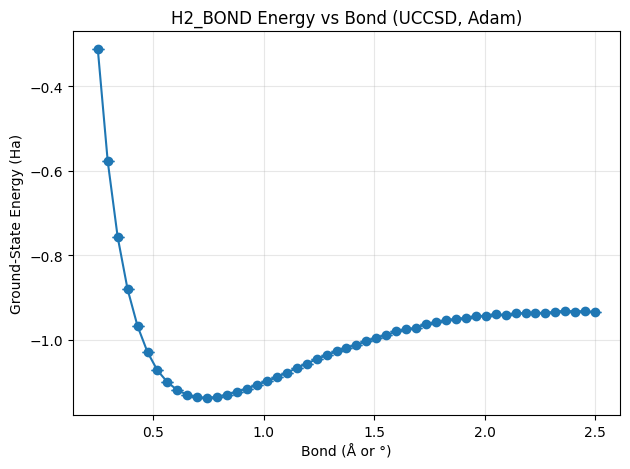

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2_BOND/vqe_geometry_scan_bond_UCCSD_Adam.png
Minimum energy: -1.136755 ± 0.000000 at bond=0.745


In [3]:
results = run_vqe_geometry_scan(
    molecule="H2_BOND",
    param_name="bond",
    param_values=bond_lengths,
    ansatz_name="UCCSD",
    optimizer_name="Adam",
    steps=25,
    stepsize=0.2,
    seeds=seeds,
    force=False,
    mapping="jordan_wigner",
    show=True,
)

# 📌 Extract Approximate Equilibrium Bond Length

In [4]:
params, mean_E, std_E = zip(*results)
params = np.array(params, dtype=float)
mean_E = np.array(mean_E, dtype=float)
std_E = np.array(std_E, dtype=float)

min_idx = int(np.argmin(mean_E))
r_opt = float(params[min_idx])
E_opt = float(mean_E[min_idx])
dE_opt = float(std_E[min_idx])

print(f"\nEstimated equilibrium bond length (H–H): {r_opt:.5f} Å")
print(f"Minimum VQE ground-state energy: {E_opt:.8f} ± {dE_opt:.8f} Ha")


Estimated equilibrium bond length (H–H): 0.74500 Å
Minimum VQE ground-state energy: -1.13675481 ± 0.00000000 Ha


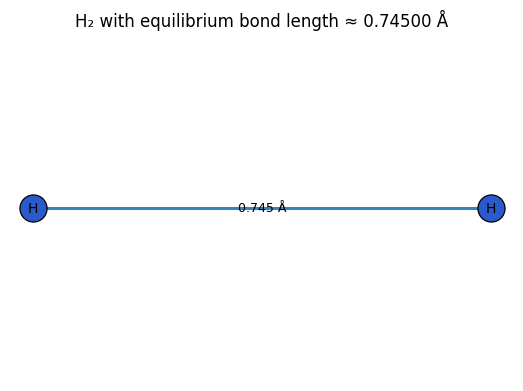

In [5]:
# Draw molecule at the estimated equilibrium bond length
sym = ["H", "H"]
coords = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.0, 0.0, r_opt],
    ]
)

plot_molecule(
    sym,
    coords,
    title=f"H₂ with equilibrium bond length ≈ {r_opt:.5f} Å",
    bonds=[(0, 1)],
    angles=[],
    show_bond_lengths=True,
    show_atom_indices=False,
)
plt.show()